In [1]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [2]:
# Read data from CSV files
data_2019_2020 = pd.read_csv('/content/transfermarkt_fbref_201920.csv', sep=';', engine='python')
data_2017_2018 = pd.read_csv('/content/transfermarkt_fbref_201718.csv', sep=';', engine='python')
data_2018_2019 = pd.read_csv('/content/transfermarkt_fbref_201819.csv', sep=';', engine='python')


# Concatenate the dataframes
merged_data = pd.concat([data_2019_2020, data_2018_2019, data_2017_2018], ignore_index=True)

# Sort the dataframe by 'player' column
merged_data.sort_values('player', inplace=True)

In [3]:
merged_data.dropna(subset=['player'], inplace=True)

In [4]:
player_corrected = [i for i in merged_data['player']]

In [5]:
for indice_j,nom_j in enumerate(player_corrected) :
    tab_c = list(nom_j)
    l = len(tab_c)
    for indice_c,caractere in enumerate(tab_c) :
        if caractere == 'Ă' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x81' :
                    tab_c[indice_c] = 'A'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\xad' :
                    tab_c[indice_c] = 'i'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x98' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '©' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ˇ' :
                    tab_c[indice_c + 1] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‰' :
                    tab_c[indice_c] = 'E'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ł' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '«' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ż' :
                    tab_c[indice_c] = 'i'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‡' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '–' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '“' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '±' :
                    tab_c[indice_c] = 'n'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '' :
                    tab_c[indice_c] = 'A'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ľ' :
                    tab_c[indice_c] = 'u'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¶' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¸' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ş' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '§' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ş' :
                    tab_c[indice_c] = 'u'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¤' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '°' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                else :
                    tab_c[indice_c] = 'a'
                    break
        if caractere == 'Ł':
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'o' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Ĺ' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ź' :
                    tab_c[indice_c] = 's'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x81' :
                    tab_c[indice_c] = 'L'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\xa0' :
                    tab_c[indice_c] = 'S'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ˇ' :
                    tab_c[indice_c] = 's'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ľ' :
                    tab_c[indice_c] = 'z'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '»' :
                    tab_c[indice_c] = 'Z'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '„' :
                    tab_c[indice_c] = 'n'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Ä' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '›' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ť' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '…' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '™' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‡' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x83' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Č' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '›' :
                    tab_c[indice_c] = 't'
                    del tab_c[indice_c + 1]
                    break
    player_corrected[indice_j] = "".join(tab_c)

In [6]:
merged_data = merged_data.drop(['player'], axis=1)
merged_data.insert(0, 'player', player_corrected)


In [7]:
merged_data.drop(columns=['Column1','Unnamed: 0', 'Attendance','birth_year', 'MP'], inplace=True)

merged_data.head()

,player,nationality,position,squad,age,value,height,position2,foot,league,...,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,Season
466,Aaron Connolly,ie IRL,FW,Brighton,19.0,4000000.0,175.0,Forward - Centre-Forward,right,Premier League,...,41.0,1.08,41.2,54.5,-13.3,-0.35,0.0,0.0,0.0,201920#
7066,Aaron Cresswell,eng ENG,DF,West Ham,27.0,12000000.0,170.0,Defender - Left-Back,left,Premier League,...,42.0,1.11,37.3,57.8,-20.5,-0.54,0.0,0.0,0.0,201718#
4691,Aaron Cresswell,eng ENG,DF,West Ham,28.0,10000000.0,170.0,Defender - Left-Back,left,Premier League,...,52.0,1.37,49.1,61.0,-11.9,-0.31,0.0,0.0,0.0,201819#
2576,Aaron Cresswell,eng ENG,DF,West Ham,29.0,6000000.0,170.0,Defender - Left-Back,left,Premier League,...,39.0,1.03,46.2,61.1,-14.8,-0.39,0.0,0.0,NaN,201920#
5688,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1500000.0,183.0,midfield - Attacking Midfield,left,Bundesliga,...,31.0,0.91,37.1,52.7,-15.7,-0.46,0.0,0.0,0.0,201718#


In [8]:
#adding dummy variables to dataset
merged_data = pd.get_dummies(merged_data, columns=['league'])
merged_data = merged_data.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
merged_data = pd.get_dummies(merged_data,columns=['Season'])
merged_data = pd.get_dummies(merged_data,columns=['foot'])
#deleting potential outliers that actually contribute nothing
merged_data = merged_data[merged_data['value']>1000000]
merged_data = merged_data[merged_data['games']>5]
merged_data = merged_data[merged_data['age']>0]
merged_data = merged_data[merged_data['height']>0]

In [9]:
#MIDFIELDERS
data_midfielders1 = merged_data[merged_data['position2'].str[:10]=='Midfielder']
data_midfielders2 = merged_data[merged_data['position2'].str[:8]=='midfield']
data_midfielders = pd.concat([data_midfielders2, data_midfielders2], ignore_index=True)

In [10]:
columns_with_na = data_midfielders.columns[data_midfielders.isna().any()].tolist()

rows_with_na_index = data_midfielders[data_midfielders.isna().any(axis=1)].index.tolist()

data_midfielders.loc[data_midfielders.player == "Adrián Diéguez"  ,"foot"] = "left"
data_midfielders.loc[data_midfielders.player == "Hervé Lybohy"  ,"foot"] = "left"
data_midfielders.loc[data_midfielders.player == "Hervé Lybohy"  ,"height"] = "187.0"
data_midfielders.loc[data_midfielders.player == "Juan Soriano"  ,"foot"] = "right"

data_midfielders.isna().any().any()

<ipython-input-10-353b29a85eac>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '187.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_midfielders.loc[data_midfielders.player == "Hervé Lybohy"  ,"height"] = "187.0"


True

In [11]:
data_midfielders['foot'] = data_midfielders['foot'].fillna('Unknown')
data_midfielders = pd.get_dummies(data_midfielders, columns=['foot'], drop_first=True)
from sklearn.impute import SimpleImputer
num_columns = data_midfielders.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
data_midfielders[num_columns] = num_imputer.fit_transform(data_midfielders[num_columns])


In [12]:
data_midfielders = data_midfielders.dropna()
data_midfielders = data_midfielders.dropna(subset=['value'])
data_midfielders = data_midfielders[data_midfielders['value'] != 0]
data_midfielders.isna().any().any()

False

In [ ]:
data_midfielders.head()

,player,nationality,position,squad,age,value,height,position2,games,games_starts,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
0,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1500000.0,183.0,midfield - Attacking Midfield,28.0,26.0,...,False,False,False,False,True,False,False,False,True,False
1,Aaron Mooy,au AUS,MF,Huddersfield,26.0,10000000.0,179.0,midfield - Central Midfield,36.0,34.0,...,False,False,True,False,True,False,False,False,False,True
2,Aaron Ramsey,wal WAL,MF,Arsenal,26.0,45000000.0,182.0,midfield - Central Midfield,24.0,21.0,...,False,False,True,False,True,False,False,True,False,False
3,Abdoulaye Doucouré,fr FRA,MF,Watford,24.0,15000000.0,183.0,midfield - Central Midfield,37.0,37.0,...,False,False,True,False,True,False,False,False,False,True
4,Abdoulaye Touré,fr FRA,MF,Nantes,23.0,8000000.0,188.0,midfield - Defensive Midfield,36.0,31.0,...,False,True,False,False,True,False,False,False,False,True


In [13]:
# Ensure boolean features are encoded as integers (0 and 1)
data_midfielders['isPremierLeague'] = data_midfielders['isPremierLeague'].astype(int)
data_midfielders['isLigue1'] = data_midfielders['isLigue1'].astype(int)
data_midfielders['isSerieA'] = data_midfielders['isSerieA'].astype(int)
data_midfielders['isLaLiga'] = data_midfielders['isLaLiga'].astype(int)
data_midfielders['isBundesliga'] = data_midfielders['isBundesliga'].astype(int)


In [14]:
def ln(x):
    return np.log(x)

Evaluating OLS Model:
OLS Model - MSE: 0.34422128100621174, MAE: 0.4575971971904658
Evaluating Decision Tree Model:
Decision Tree Model - MSE: 0.07839321313922755, MAE: 0.10048176858254525
Evaluating Random Forest Model:
Random Forest Model - MSE: 0.09924243343838733, MAE: 0.22901852102119216
Actual vs Predicted (ln_value) for OLS Model:
        Actual  Predicted
199  15.201805  15.235525
422  15.761421  15.690921
695  16.523561  16.073481
751  16.705882  16.383785
388  15.830414  15.181168
580  15.894952  15.450288
827  18.315320  18.180686
530  14.914123  15.799433
494  14.077875  14.869170
174  17.370859  16.621067
Actual vs Predicted (ln_value) for Decision Tree Model:
        Actual  Predicted
199  15.201805  15.201805
422  15.761421  15.761421
695  16.523561  16.118096
751  16.705882  16.705882
388  15.830414  15.830414
580  15.894952  15.894952
827  18.315320  18.315320
530  14.914123  14.914123
494  14.077875  14.077875
174  17.370859  17.370859
Actual vs Predicted (ln_value) f

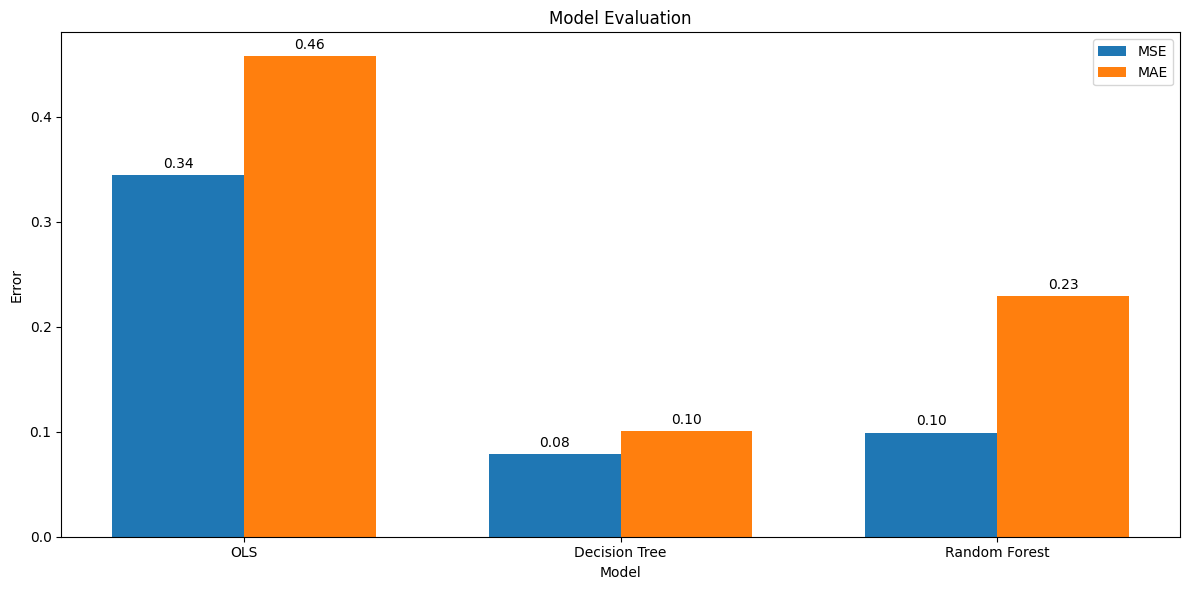

In [15]:
# Function to train and evaluate an OLS model
def train_and_evaluate_ols(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Create the formula for the OLS model
    formula = 'ln_value ~ ' + ' + '.join(features)

    # Train the OLS model
    model = smf.ols(formula, data=train).fit()

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test)

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Function to train and evaluate a Decision Tree model
def train_and_evaluate_decision_tree(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Train the decision tree model
    model = DecisionTreeRegressor(random_state=random_state)
    model.fit(train[features], train['ln_value'])

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test[features])

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Function to train and evaluate a Random Forest model
def train_and_evaluate_random_forest(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Train the random forest model
    model = RandomForestRegressor(random_state=random_state)
    model.fit(train[features], train['ln_value'])

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test[features])

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Feature sets for midfielders
features = [
    'age', 'goals', 'CL', 'passes_completed_short', 'passes_into_final_third',
    'Pts', 'xG', 'xGA', 'xg_xa_per90', 'carry_distance', 'tackles_won',
    'isPremierLeague', 'isLigue1', 'isSerieA', 'isLaLiga','isBundesliga'
]

# Train and evaluate models
print('Evaluating OLS Model:')
ols_mse, ols_mae, test_ols = train_and_evaluate_ols(data_midfielders, features, random_state=42)
print(f'OLS Model - MSE: {ols_mse}, MAE: {ols_mae}')

print('Evaluating Decision Tree Model:')
dt_mse, dt_mae, test_dt = train_and_evaluate_decision_tree(data_midfielders, features, random_state=42)
print(f'Decision Tree Model - MSE: {dt_mse}, MAE: {dt_mae}')

print('Evaluating Random Forest Model:')
rf_mse, rf_mae, test_rf = train_and_evaluate_random_forest(data_midfielders, features, random_state=42)
print(f'Random Forest Model - MSE: {rf_mse}, MAE: {rf_mae}')

# Print actual vs predicted values for some players
print('Actual vs Predicted (ln_value) for OLS Model:')
print(pd.DataFrame({'Actual': test_ols['ln_value'], 'Predicted': test_ols['ln_value_pred']}).head(10))

print('Actual vs Predicted (ln_value) for Decision Tree Model:')
print(pd.DataFrame({'Actual': test_dt['ln_value'], 'Predicted': test_dt['ln_value_pred']}).head(10))

print('Actual vs Predicted (ln_value) for Random Forest Model:')
print(pd.DataFrame({'Actual': test_rf['ln_value'], 'Predicted': test_rf['ln_value_pred']}).head(10))

# Plotting the results
labels = ['OLS', 'Decision Tree', 'Random Forest']
mse_values = [ols_mse, dt_mse, rf_mse]
mae_values = [ols_mae, dt_mae, rf_mae]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Model Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


Evaluating OLS Model:
OLS Model - MSE: 0.3592670273957975, MAE: 0.46725247362897376
Evaluating Decision Tree Model:
Decision Tree Model - MSE: 0.08630908283417979, MAE: 0.0957041488913325
Evaluating Random Forest Model:
Random Forest Model - MSE: 0.10211990227298769, MAE: 0.22912756550701918
Actual vs Predicted (ln_value) for OLS Model:
        Actual  Predicted
199  15.201805  15.188810
422  15.761421  15.625140
695  16.523561  16.043232
751  16.705882  16.282426
388  15.830414  15.256951
580  15.894952  15.479786
827  18.315320  18.131301
530  14.914123  15.786687
494  14.077875  14.995226
174  17.370859  16.613656
Actual vs Predicted (ln_value) for Decision Tree Model:
        Actual  Predicted
199  15.201805  15.201805
422  15.761421  15.761421
695  16.523561  16.118096
751  16.705882  16.705882
388  15.830414  15.830414
580  15.894952  15.894952
827  18.315320  18.315320
530  14.914123  14.914123
494  14.077875  14.077875
174  17.370859  17.370859
Actual vs Predicted (ln_value) fo

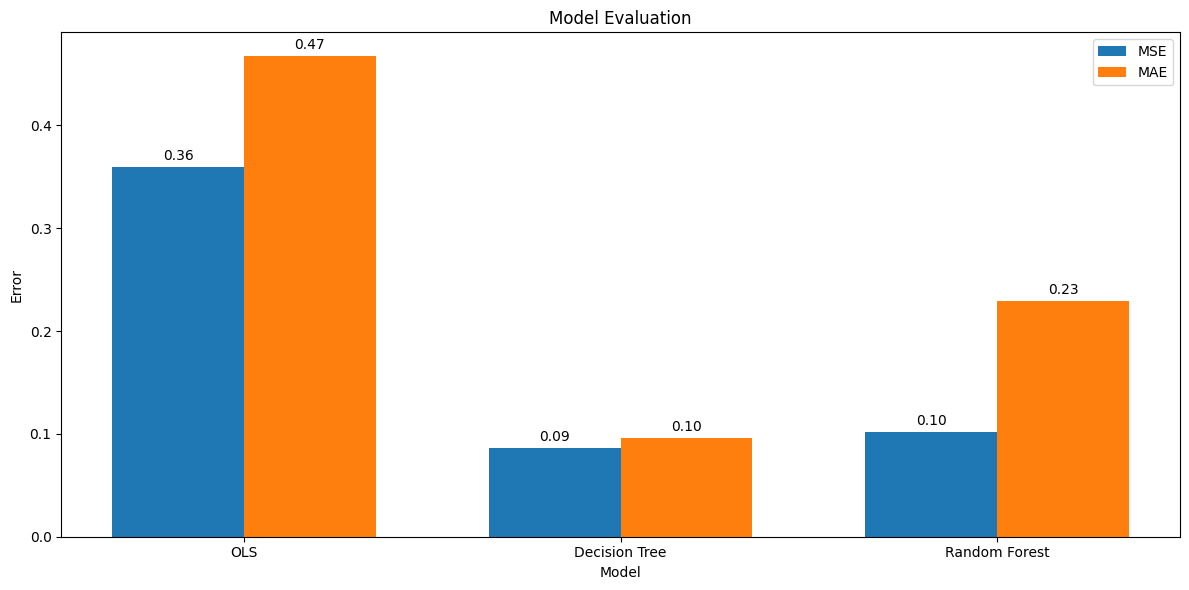

In [ ]:
# Function to train and evaluate an OLS model
def train_and_evaluate_ols(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Create the formula for the OLS model
    formula = 'ln_value ~ ' + ' + '.join(features)

    # Train the OLS model
    model = smf.ols(formula, data=train).fit()

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test)

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Function to train and evaluate a Decision Tree model
def train_and_evaluate_decision_tree(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Train the decision tree model
    model = DecisionTreeRegressor(random_state=random_state)
    model.fit(train[features], train['ln_value'])

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test[features])

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Function to train and evaluate a Random Forest model
def train_and_evaluate_random_forest(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Train the random forest model
    model = RandomForestRegressor(random_state=random_state)
    model.fit(train[features], train['ln_value'])

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test[features])

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Feature sets for midfielders
features = [
    'age', 'goals', 'CL', 'passes_completed_short', 'passes_into_final_third',
    'Pts', 'xG', 'xGA', 'xg_xa_per90', 'carry_distance', 'tackles_won',
    'isPremierLeague', 'isLigue1'
]

# Train and evaluate models
print('Evaluating OLS Model:')
ols_mse, ols_mae, test_ols = train_and_evaluate_ols(data_midfielders, features, random_state=42)
print(f'OLS Model - MSE: {ols_mse}, MAE: {ols_mae}')

print('Evaluating Decision Tree Model:')
dt_mse, dt_mae, test_dt = train_and_evaluate_decision_tree(data_midfielders, features, random_state=42)
print(f'Decision Tree Model - MSE: {dt_mse}, MAE: {dt_mae}')

print('Evaluating Random Forest Model:')
rf_mse, rf_mae, test_rf = train_and_evaluate_random_forest(data_midfielders, features, random_state=42)
print(f'Random Forest Model - MSE: {rf_mse}, MAE: {rf_mae}')

# Print actual vs predicted values for some players
print('Actual vs Predicted (ln_value) for OLS Model:')
print(pd.DataFrame({'Actual': test_ols['ln_value'], 'Predicted': test_ols['ln_value_pred']}).head(10))

print('Actual vs Predicted (ln_value) for Decision Tree Model:')
print(pd.DataFrame({'Actual': test_dt['ln_value'], 'Predicted': test_dt['ln_value_pred']}).head(10))

print('Actual vs Predicted (ln_value) for Random Forest Model:')
print(pd.DataFrame({'Actual': test_rf['ln_value'], 'Predicted': test_rf['ln_value_pred']}).head(10))

# Plotting the results
labels = ['OLS', 'Decision Tree', 'Random Forest']
mse_values = [ols_mse, dt_mse, rf_mse]
mae_values = [ols_mae, dt_mae, rf_mae]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Model Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()
